In [0]:
import pandas as pd

In [0]:
train = pd.read_csv("./MNIST DATA/train.csv")
test = pd.read_csv("./MNIST DATA/test.csv")

In [0]:
X = train.drop(labels=["label"], axis=1)
y = train["label"]

In [5]:
X.dtypes,y.dtypes

(pixel0      int64
 pixel1      int64
 pixel2      int64
 pixel3      int64
 pixel4      int64
             ...  
 pixel779    int64
 pixel780    int64
 pixel781    int64
 pixel782    int64
 pixel783    int64
 Length: 784, dtype: object, dtype('int64'))

In [6]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
len(X),len(y)

(42000, 42000)

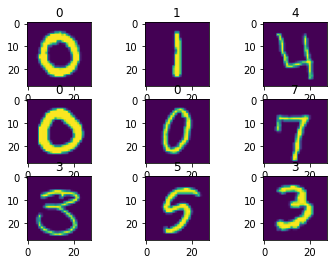

In [8]:
z=X.values.reshape(X.shape[0],28,28)
import matplotlib.pyplot as plt
for i in range (1,10):  
    plt.subplot(3,3,i)
    #plt.plot(z[i])
    plt.title(y[i])
    plt.imshow(z[i])
    

In [0]:
from sklearn.utils import shuffle
X_s,y_s=shuffle(X,y,random_state=42)

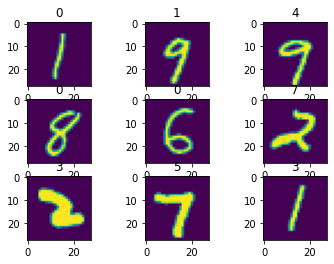

In [10]:
p=X_s.values.reshape(X_s.shape[0],28,28)
import matplotlib.pyplot as plt
for i in range (1,10):  
    plt.subplot(3,3,i)
    #plt.plot(z[i])
    plt.title(y_s[i])
    plt.imshow(p[i])
    

In [0]:
X_train=X_s[1:int(0.7*len(X))]
X_test=X_s[(int(0.7)*len(X)):]
y_train=y_s[1:int(0.7*len(y))]
y_test=y_s[(int(0.7)*len(y)):]

In [12]:
len(X_train),len(X_test),len(y_train),len(y_test)

(29398, 42000, 29398, 42000)

In [0]:
X_train=X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test=X_test.values.reshape(X_test.shape[0], 28, 28, 1)
test=test.values.reshape(test.shape[0] , 28 , 28 , 1)

In [0]:
X_train=X_train/255
X_test=X_test/255
test=test/255

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam

In [0]:
model=Sequential()
model.add(Conv2D(128,kernel_size=3,input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=1,activation='relu'))
model.add(AveragePooling2D(1,1))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))


model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, batch_size=512, epochs=20, validation_data=(X_test,y_test))


Epoch 1/20
58/58 [==============================] - 6s 102ms/step - loss: 1.3836 - accuracy: 0.5217 - val_loss: 0.4072 - val_accuracy: 0.8818
Epoch 2/20
58/58 [==============================] - 5s 92ms/step - loss: 0.4058 - accuracy: 0.8806 - val_loss: 0.1845 - val_accuracy: 0.9456
Epoch 3/20
58/58 [==============================] - 5s 91ms/step - loss: 0.2578 - accuracy: 0.9245 - val_loss: 0.1279 - val_accuracy: 0.9624
Epoch 4/20
58/58 [==============================] - 5s 92ms/step - loss: 0.1958 - accuracy: 0.9409 - val_loss: 0.1027 - val_accuracy: 0.9691
Epoch 5/20
58/58 [==============================] - 5s 91ms/step - loss: 0.1606 - accuracy: 0.9517 - val_loss: 0.0804 - val_accuracy: 0.9754
Epoch 6/20
58/58 [==============================] - 5s 91ms/step - loss: 0.1362 - accuracy: 0.9590 - val_loss: 0.0709 - val_accuracy: 0.9787
Epoch 7/20
58/58 [==============================] - 5s 91ms/step - loss: 0.1245 - accuracy: 0.9622 - val_loss: 0.0618 - val_accuracy: 0.9812
Epoch 8/20
5

In [0]:
prediction=model.predict(test)

In [21]:
sub1=pd.DataFrame(prediction)
sub1=pd.DataFrame(sub1.idxmax(axis=1))
sub1.index.name='ImageId'
sub1=sub1.rename(columns={0:'Label'}).reset_index()
sub1['ImageId']=sub1['ImageId']+1
sub1.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [0]:
#sub1.to_csv('/content/drive/My Drive/nodataaug_mnist_submission.csv',index=False)

In [0]:
import matplotlib.pyplot as plt

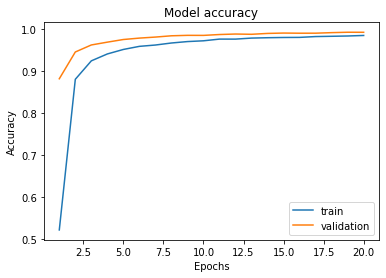

In [24]:
ephs=range(1,21)
plt.plot(ephs,history.history['accuracy'])
plt.plot(ephs,history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

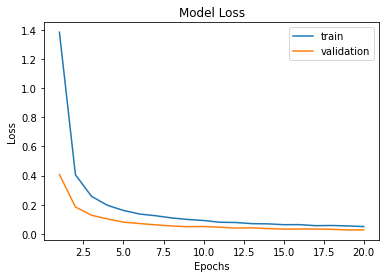

In [25]:
ephs=range(1,21)
plt.plot(ephs,history.history['loss'])
plt.plot(ephs,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

In [0]:
#model.save('/content/drive/My Drive/ModelSave')

In [27]:
##DATA AUGMENTATION###
'''
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

'''

Using TensorFlow backend.


In [28]:
history1=model.fit(datagen.flow(X_train,y_train, batch_size=512),epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
58/58 [==============================] - 17s 294ms/step - loss: 0.3055 - accuracy: 0.9084 - val_loss: 0.0472 - val_accuracy: 0.9856
Epoch 2/20
58/58 [==============================] - 17s 291ms/step - loss: 0.1982 - accuracy: 0.9400 - val_loss: 0.0475 - val_accuracy: 0.9855
Epoch 3/20
58/58 [==============================] - 17s 295ms/step - loss: 0.1876 - accuracy: 0.9422 - val_loss: 0.0462 - val_accuracy: 0.9861
Epoch 4/20
58/58 [==============================] - 17s 287ms/step - loss: 0.1724 - accuracy: 0.9470 - val_loss: 0.0460 - val_accuracy: 0.9859
Epoch 5/20
58/58 [==============================] - 17s 290ms/step - loss: 0.1631 - accuracy: 0.9499 - val_loss: 0.0419 - val_accuracy: 0.9874
Epoch 6/20
58/58 [==============================] - 17s 289ms/step - loss: 0.1545 - accuracy: 0.9526 - val_loss: 0.0420 - val_accuracy: 0.9871
Epoch 7/20
58/58 [==============================] - 17s 289ms/step - loss: 0.1522 - accuracy: 0.9536 - val_loss: 0.0419 - val_accuracy: 0.9871

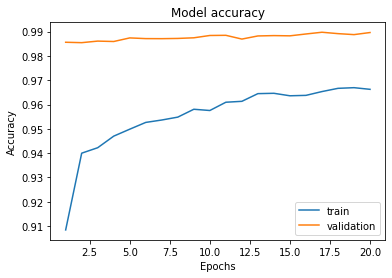

In [38]:
'''
ephs=range(1,21)
plt.plot(ephs,history1.history['accuracy'])
plt.plot(ephs,history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

'''

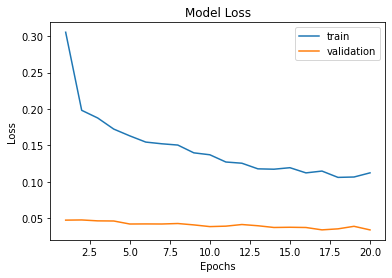

In [39]:
'''
ephs=range(1,21)
plt.plot(ephs,history1.history['loss'])
plt.plot(ephs,history1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()
'''


In [0]:
#prediction1=model.predict(test)


In [41]:
'''
sub=pd.DataFrame(prediction1)
sub=pd.DataFrame(sub.idxmax(axis=1))
sub.index.name='ImageId'
sub=sub.rename(columns={0:'Label'}).reset_index()
sub['ImageId']=sub['ImageId']+1
sub.head()

'''

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [0]:
#sub.to_csv('/content/drive/My Drive/dataaug_mnist_submission.csv',index=False)